In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neurolab as nl
%matplotlib inline

In [4]:
# generate random data
def gen_data(num_points):
    # wave
    w_one = 0.6 * np.sin(np.arange(0, num_points))
    w_two = 3.5 * np.sin(np.arange(0, num_points))
    w_three = 1.2 * np.sin(np.arange(0, num_points))
    w_four = 4.6 * np.sin(np.arange(0, num_points))
    # amplitude
    a_one = np.ones(num_points)
    a_two = 2.2 + np.zeros(num_points)
    a_three = 3.1 * np.ones(num_points)
    a_four = 0.9 + np.zeros(num_points)
    
    wave = np.array([w_one,w_two,w_three,w_four]).reshape(num_points*4,1)
    amp = np.array([a_one,a_two,a_three,a_four]).reshape(num_points*4,1)
    return wave, amp

In [7]:
def visulize_output(nn, num_points_test):
    wave, amp = gen_data(num_points_test)
    output = nn.sim(wave)
    plt.plot(amp.reshape(num_points_test*4))
    plt.plot(output.reshape(num_points_test*4))
    
if __name__ == '__main__':
    num_points = 50
    wave, amp = gen_data(num_points)

In [8]:
# creating layer
nn = nl.net.newelm([[-2,2]],[10,1], [nl.trans.TanSig(), nl.trans.PureLin()])#10,1 perceptrons in layers respec

In [13]:
nn.layers

In [15]:
# set initializer function for each layer
nn.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
nn.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
nn.init()

In [17]:
########  Training
error_progress = nn.train(wave, amp, epochs=1200, show=100, goal=0.01)

Epoch: 100; Error: 0.7312705423599166;
Epoch: 200; Error: 0.5573432802684885;
Epoch: 300; Error: 0.21100255605722257;
Epoch: 400; Error: 0.21827641445161391;
Epoch: 500; Error: 0.17193943028202135;
Epoch: 600; Error: 0.08506329764133247;
Epoch: 700; Error: 0.07885886168688302;
Epoch: 800; Error: 0.06098738704638331;
Epoch: 900; Error: 0.03926656761677125;
Epoch: 1000; Error: 0.030374556490354775;
Epoch: 1100; Error: 0.02736172045067375;
Epoch: 1200; Error: 0.02495550553644616;
The maximum number of train epochs is reached


(0, 300)

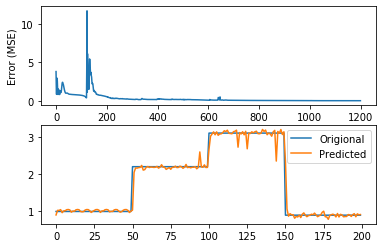

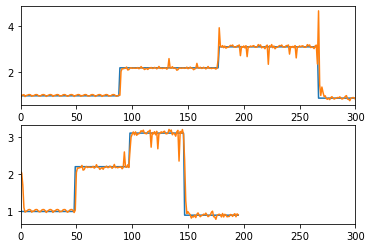

In [18]:
output = nn.sim(wave)

plt.subplot(211)
plt.plot(error_progress)
plt.xlabel('#Epochs')
plt.ylabel('Error (MSE)')

plt.subplot(212)
plt.plot(amp.reshape(num_points*4))
plt.plot(output.reshape(num_points*4))
plt.legend(['Origional', 'Predicted'])

plt.figure()
plt.subplot(211)
visulize_output(nn, 89)
plt.xlim([0,300])

plt.subplot(212)
visulize_output(nn, 49)
plt.xlim([0,300])
